In [1]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/房價_201010row_outlier_final_KDEclass.csv')
plt.rcParams['font.family'] = 'Heiti TC'

In [3]:
df.shape

(201010, 58)

In [4]:
df.describe()

,建築完成年月,建物移轉總面積平方公尺,有無管理組織,總價元,單價元平方公尺,緯度,經度,bad_count,good_count,陽台有無,...,建築完成年,交易年_民國,屋齡,good_count_0_500,good_count_500_1000,good_count_1000_1500,bad_count_0_500,bad_count_500_1000,bad_count_1000_1500,KDE_class
count,1.731990e+05,201010.000000,201010.000000,2.010100e+05,201010.000000,201010.000000,201010.000000,201010.000000,201010.000000,201010.000000,...,201010.000000,201010.000000,201010.000000,201010.000000,201010.000000,201010.000000,201010.000000,201010.000000,201010.000000,201010.000000
mean,9.536955e+05,167.163697,0.423765,9.255627e+06,56310.673824,23.043391,120.234813,4.577837,0.852848,0.761400,...,82.114751,107.693194,25.578444,0.946744,2.385797,3.582349,5.061554,13.076852,20.774703,1.896856
std,1.511770e+05,265.947367,0.494155,1.181899e+07,23478.266091,0.099644,0.079870,6.314229,1.308961,0.426229,...,35.773050,3.455129,36.912686,1.327739,2.735231,4.175769,6.345606,12.993476,20.844643,0.807584
min,0.000000e+00,0.860000,0.000000,3.500000e+04,16550.000000,22.503404,120.054968,0.000000,0.000000,0.000000,...,0.000000,101.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,8.309140e+05,114.330000,0.000000,5.220000e+06,38860.000000,22.985381,120.194986,1.000000,0.000000,1.000000,...,76.000000,105.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,8.000000,1.000000
50%,1.020522e+06,152.530000,0.000000,7.680000e+06,51959.000000,23.015778,120.229485,4.000000,0.000000,1.000000,...,95.000000,108.000000,11.000000,1.000000,2.000000,2.000000,4.000000,11.000000,16.000000,2.000000
75%,1.080924e+06,190.410000,1.000000,1.120000e+07,70513.000000,23.068184,120.262734,6.000000,1.000000,1.000000,...,107.000000,110.000000,31.000000,1.000000,4.000000,5.000000,7.000000,17.000000,25.000000,3.000000
max,1.130717e+06,57128.460000,1.000000,2.100000e+09,121643.000000,35.676423,139.650027,100.000000,10.000000,1.000000,...,113.000000,113.000000,113.000000,10.000000,18.000000,27.000000,101.000000,108.000000,156.000000,3.000000


In [5]:
pd.set_option('display.max_rows', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201010 entries, 0 to 201009
Data columns (total 58 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  201010 non-null  object 
 1   土地位置建物門牌              201010 non-null  object 
 2   交易年月日                 201010 non-null  object 
 3   建築完成年月                173199 non-null  float64
 4   建物移轉總面積平方公尺           201010 non-null  float64
 5   有無管理組織                201010 non-null  int64  
 6   總價元                   201010 non-null  int64  
 7   單價元平方公尺               201010 non-null  float64
 8   備註                    53145 non-null   object 
 9   編號                    201010 non-null  object 
 10  緯度                    201010 non-null  float64
 11  經度                    201010 non-null  float64
 12  bad_count             201010 non-null  float64
 13  good_count            201010 non-null  float64
 14  建築型態清整                201010 non-null  object 
 15  

In [6]:
print(df['有無管理組織'].unique())

# # 將 '有' 轉換為 1，'無' 轉換為 0，並處理 NaN 值
df['有無管理組織'] = df['有無管理組織'].map({'有': 1, '無': 0}).fillna(0)

# # 檢查轉換後的結果
print(df['有無管理組織'].head())


[0 1]
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 有無管理組織, dtype: float64


In [7]:
# 定義欄位名稱對應的字典
columns_rename = {
    'good_count_0_500': '迎毗設施_0m_500m',
    'good_count_500_1000': '迎毗設施_500m_1000m',
    'good_count_1000_1500': '迎毗設施_1000m_1500m',
    'bad_count_0_500': '嫌惡設施_0m_500m',
    'bad_count_500_1000': '嫌惡設施_500m_1000m',
    'bad_count_1000_1500': '嫌惡設施_1000m_1500m',
    'KDE_class': '房屋交易密度分群'
}

# 使用 rename() 方法重新命名欄位
df = df.rename(columns=columns_rename)

# 確認修改後的欄位名稱
print(df.columns)

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間', '迎毗設施_0m_500m', '迎毗設施_500m_1000m', '迎毗設施_1000m_1500m',
       '嫌惡設施_0m_500m', '嫌惡設施_500m_1000m', '嫌惡設施_1000m_1500m', '房屋交易密度分群'],
      dtype='object')


In [8]:
# df.info()

In [9]:
df.isnull().sum()

鄉鎮市區                     0
土地位置建物門牌                 0
交易年月日                    0
建築完成年月               27811
建物移轉總面積平方公尺              0
有無管理組織                   0
總價元                      0
單價元平方公尺                  0
備註                  147865
編號                       0
緯度                       0
經度                       0
bad_count                0
good_count               0
建築型態清整                   0
陽台有無                     0
是否含額外土地                  0
建築型態_住商大樓                0
建築型態_公寓                  0
建築型態_其他                  0
建築型態_透天厝                 0
房地總價元                    0
格局比例_房                   0
格局比例_廳                   0
格局比例_衛                   0
格局比例_隔間                  0
是否包含車位                   0
建材_磚石                    0
建材_鋼筋                    0
建材_鋼骨                    0
建材_竹木                    0
住                        0
商                        0
工                        0
農                        0
移轉層次_騎樓                  0
移轉層次_屋頂                  0
移

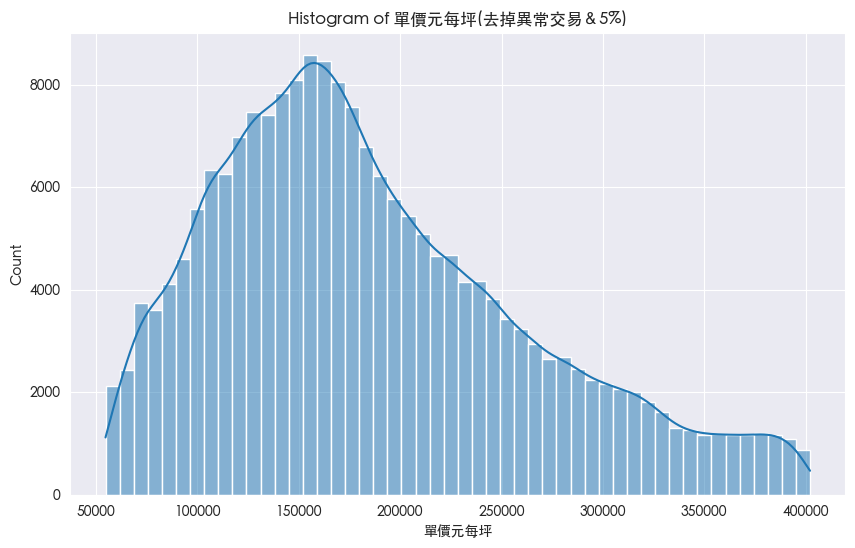

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單價元每坪(去掉異常交易＆5%)')


# 儲存圖檔，指定輸出路徑和檔名
output_path = "/Users/debbie/house/output/out-outlier-final_Histogram of 單價元每坪.png"
plt.savefig(output_path, dpi=300)
plt.show()

1. 處理異常值（outliers）：

    min 為 0，這可能是異常數據，應考慮刪除或補充這些數據。
    max 值高達 70,565,880，這可能也是極端值。可以使用四分位距數據（如 Q1 和 Q3）來計算並排除異常值：
    使用 IQR（Q3 - Q1），範圍外的數據可以被視為異常值，通常為低於 Q1 - 1.5*IQR 或高於 Q3 + 1.5*IQR 的數據。
2. 處理零值：

    如果 min 為 0 是無效數據，可以考慮將這些值濾除或使用平均值、中位數等進行填補。
3. 資料分佈檢查與轉換：

    檢查數據的偏態（skewness）。若數據呈現強烈的右偏分佈（偏態值 > 1），可以考慮對 y 進行對數變換（log transformation），如 log(y + 1)，以減少異常高值的影響，使數據分佈更加正態，從而提升模型的效果。
4. 標準化（Normalization）或正規化（Normalization）：

    若使用對數變換，對於 y 這樣的目標變數通常無需進行標準化。但在進行一些模型（如正則化模型）時，標準化有時能幫助收斂速度更快。

In [11]:
print(df['單價元每坪'].describe())

count    201010.000000
mean     186150.980866
std       77614.099869
min       54710.741750
25%      128462.805100
50%      171765.282815
75%      233100.817705
max      402125.604755
Name: 單價元每坪, dtype: float64


### 偏態值為 0.69

In [12]:
from scipy.stats import skew
# 計算 [單價元每坪] 欄位的偏態
skewness = skew(df['單價元每坪'].dropna())  # 避免 NaN 影響偏態計算
print(f"[單價元每坪] 欄位的偏態: {skewness}")

[單價元每坪] 欄位的偏態: 0.6839898672237217


In [13]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間', '迎毗設施_0m_500m', '迎毗設施_500m_1000m', '迎毗設施_1000m_1500m',
       '嫌惡設施_0m_500m', '嫌惡設施_500m_1000m', '嫌惡設施_1000m_1500m', '房屋交易密度分群'],
      dtype='object')

## 分類欄位
- 建築型態：'建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝'
- 格局比例：'格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間'（佔比）
- 建材：'建材_磚石','建材_鋼筋', '建材_鋼骨', '建材_竹木'
- 土地用途：'住', '商', '工', '農'
- 移轉層次：'移轉層次_騎樓', '移轉層次_屋頂','移轉層次_一二樓'
- 屋齡：'屋齡區間'
- 好物設施：'good_count_0_500', 'good_count_500_1000','good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000','bad_count_1000_1500'
## 有無欄位
- '有無管理組織'
- '陽台有無'
- '是否含額外土地'
- '是否包含車位'
- '有無電梯'
## 其他
- '交易年份
- ~'屋齡'~
- '房地總價元(坪)'
- '建物移轉總面積坪'

In [14]:
# 查看這些欄位的統計描述
print(df[['格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間']].describe())


              格局比例_房         格局比例_廳         格局比例_衛        格局比例_隔間
count  201010.000000  201010.000000  201010.000000  201010.000000
mean        0.376966       0.225691       0.280476       0.116779
std         0.050960       0.055404       0.062064       0.026168
min         0.250000       0.083333       0.166667       0.066667
25%         0.333333       0.181818       0.250000       0.090909
50%         0.375000       0.230769       0.272727       0.125000
75%         0.400000       0.250000       0.307692       0.125000
max         0.500000       0.333333       0.444444       0.166667


In [15]:
df['比例總和'] = df['格局比例_房'] + df['格局比例_廳'] + df['格局比例_衛'] + df['格局比例_隔間']
print(df['比例總和'].describe())


count    201010.000000
mean          0.999912
std           0.000660
min           0.994949
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: 比例總和, dtype: float64


In [16]:
# 創建一個函數，根據 One-Hot 編碼欄位的值返回類別標籤
def get_building_type(row):
    if row['移轉層次_騎樓'] == 1:
        return '騎樓'
    elif row['移轉層次_屋頂'] == 1:
        return '屋頂'
    elif row['移轉層次_一二樓'] == 1:
        return '一二樓'
    else:
        return '未知'

# 應用函數，創建新的類別型欄位
df['移轉層次'] = df.apply(get_building_type, axis=1)



In [17]:
# 創建一個函數，根據 One-Hot 編碼欄位的值返回類別標籤
def get_building_type(row):
    if row['建築型態_住商大樓'] == 1:
        return '住商大樓'
    elif row['建築型態_公寓'] == 1:
        return '公寓'
    elif row['建築型態_透天厝'] == 1:
        return '透天厝'
    elif row['建築型態_其他'] == 1:
        return '其他'
    else:
        return '未知'

# 應用函數，創建新的類別型欄位
df['建築型態'] = df.apply(get_building_type, axis=1)



In [18]:
# 定義函數，根據 One-Hot 編碼欄位返回建材類別
def get_material_type(row):
    if row['建材_磚石'] == 1:
        return '磚石'
    elif row['建材_鋼筋'] == 1:
        return '鋼筋'
    elif row['建材_鋼骨'] == 1:
        return '鋼骨'
    elif row['建材_竹木'] == 1:
        return '竹木'
    else:
        return '未知'  # 處理可能的缺失值或異常值

# 應用函數，創建新的類別型欄位
df['建材種類'] = df.apply(get_material_type, axis=1)



In [19]:
# 定義函數，根據 One-Hot 編碼欄位返回土地用途類別
def get_land_use_type(row):
    if row['住'] == 1:
        return '住'
    elif row['商'] == 1:
        return '商'
    elif row['工'] == 1:
        return '工'
    elif row['農'] == 1:
        return '農'
    else:
        return '未知'  # 處理可能的缺失值或異常值

# 應用函數，創建新的類別型欄位
df['土地用途'] = df.apply(get_land_use_type, axis=1)




In [20]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 定義需要比較的分類變數
# categorical_vars = [
#     '建築型態', '土地用途','建材種類','移轉層次','屋齡區間','有無管理組織', '有無電梯', '是否包含車位', '是否含額外土地','陽台有無'
# ]

# output_path = "/Users/debbie/house/output/"

# # 遍歷每個分類變數，繪製對應的 Boxplot
# for var in categorical_vars:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(data=df, x=var, y='單價元每坪')
#     plt.title(f'單價元每坪 vs {var}')
#     plt.xlabel(var)
#     plt.ylabel('單價元每坪')
#     plt.xticks(rotation=45)  # 如果分類變數有多個類別，可以選擇旋轉 x 軸標籤
#     plt.tight_layout()
    
#         # 儲存圖檔，先儲存再顯示
#     plt.savefig(f"{output_path}out-outlier-final_{var}_regplot.png", dpi=300)
#     plt.show()
#     plt.close()  # 關閉圖形以避免記憶體佔用
    



In [21]:
value = df['建材種類'].unique()
value

array(['磚石', '鋼骨', '鋼筋', '未知', '竹木'], dtype=object)

In [22]:

# # 定义需要绘制的数值变量
# numerical_vars = ['格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間']

# # # 数据类型转换
# # df[numerical_vars] = df[numerical_vars].astype(float)
# # df['單價元每坪'] = df['單價元每坪'].astype(float)

# # # 删除缺失值
# # df_clean = df.dropna(subset=numerical_vars + ['單價元每坪'])

# # 遍历每个数值变量，绘制对应的回归图
# for var in numerical_vars:
#     plt.figure(figsize=(10, 6))
#     sns.regplot(data=df, x=var, y='單價元每坪', scatter_kws={'alpha':0.3})
#     plt.title(f'單價元每坪 vs {var}含回歸線')
#     plt.xlabel(var)
#     plt.ylabel('單價元每坪')
#     plt.grid(True)
#     plt.tight_layout()
#         # 儲存圖檔，先儲存再顯示
#     plt.savefig(f"{output_path}out-outlier-final_{var}_regplot.png", dpi=300)
#     plt.show()
#     plt.close()  # 關閉圖形以避免記憶體佔用



In [23]:
yearly_avg_price = df.groupby('交易年份')['單價元每坪'].mean().reset_index()
yearly_avg_price 

,交易年份,單價元每坪
0,2012,118540.700922
1,2013,125354.668717
2,2014,138361.725209
3,2015,141012.025757
4,2016,147258.979863
5,2017,153129.804103
6,2018,159578.895892
7,2019,168407.928538
8,2020,187963.243723
9,2021,208805.675767


1. 過濾極端值： 可以在繪圖之前過濾掉一些過高或過低的個別交易價格，比如使用百分位數過濾。

2. 調整y軸縮放： 在 plt.yscale('log') 中使用對數尺度，以便更直觀地觀察數據變化。

3. 檢查平均值計算： 確認年度平均單價的計算方法，確保是基於合理範圍內的數據進行平均。

In [24]:
# yearly_avg_price = df.groupby('交易年份')['單價元每坪'].mean().reset_index()
# plt.figure(figsize=(12, 7))

# # 绘制散点图
# sns.scatterplot(data=df, x='交易年份', y='單價元每坪', alpha=0.3, label='個別交易')

# # 绘制年度平均单价的折线图
# sns.lineplot(data=yearly_avg_price, x='交易年份', y='單價元每坪', marker='o', color='red', label='平均單價')

# plt.title('單價元每坪隨交易年份變化趨勢')
# plt.xlabel('交易年份')
# plt.ylabel('單價元每坪')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()

# # 儲存圖檔，指定輸出路徑和檔名
# output_path = "/Users/debbie/house/output/out-outlier-final_yearly_avg_price_trend.png"
# plt.savefig(output_path, dpi=300)

# plt.show()


<!-- # count_vars = [
#     'good_count_0_500', 'good_count_500_1000', 'good_count_1000_1500',
#     'bad_count_0_500', 'bad_count_500_1000', 'bad_count_1000_1500'
# ]


# for var in count_vars:
#     plt.figure(figsize=(10, 6))
#     sns.kdeplot(
#         data=df,
#         x=var,
#         y='單價元每坪',
#         cmap="Blues",
#         shade=True,
#         thresh=0.05
#     )
#     plt.title(f'單價元每坪 vs {var}（核密度图）')
#     plt.xlabel(var)
#     plt.ylabel('單價元每坪')
#     plt.tight_layout()
#     plt.show() -->

In [25]:

# # 绘制散点图和回归线
# plt.figure(figsize=(10, 6))
# sns.regplot(
#     data=df,
#     x='good_count',
#     y='單價元每坪',
#     scatter_kws={'alpha': 0.5},
#     line_kws={'color': 'blue'},
#     label='好物設施'
# )
# sns.regplot(
#     data=df,
#     x='bad_count',
#     y='單價元每坪',
#     scatter_kws={'alpha': 0.5},
#     line_kws={'color': 'red'},
#     label='壞物設施'
# )
# plt.title('單價元每坪 vs 好物/壞物設施總計數（含回歸線）')
# plt.xlabel('設施總計數')
# plt.ylabel('單價元每坪')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

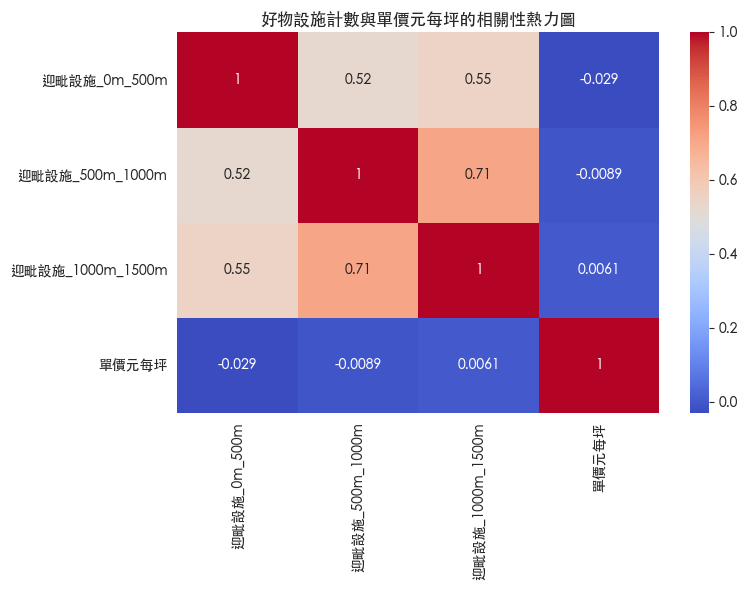

In [27]:
# 选择需要绘制的变量
heatmap_vars = ['迎毗設施_0m_500m', '迎毗設施_500m_1000m', '迎毗設施_1000m_1500m', '單價元每坪']

# 计算相关性矩阵
corr = df[heatmap_vars].corr()

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('好物設施計數與單價元每坪的相關性熱力圖')
plt.tight_layout()
plt.show()

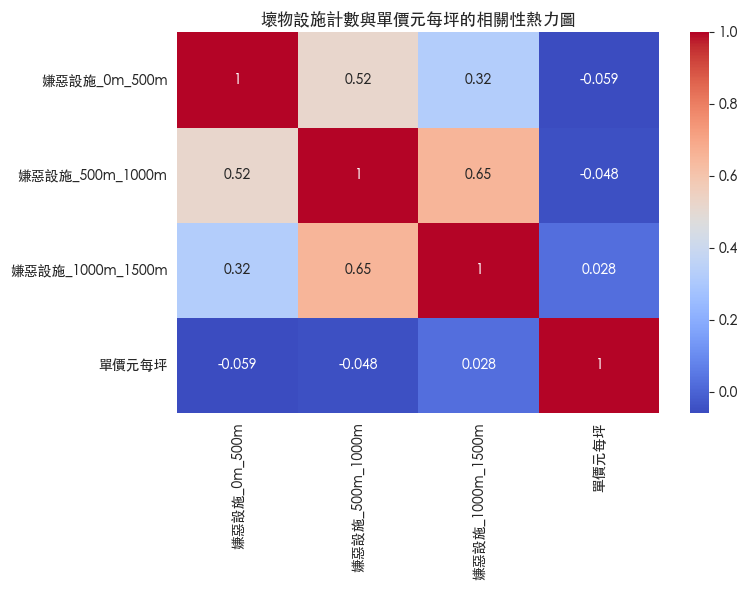

In [29]:
# 选择需要绘制的变量
heatmap_vars = ['嫌惡設施_0m_500m', '嫌惡設施_500m_1000m', '嫌惡設施_1000m_1500m', '單價元每坪']

# 计算相关性矩阵
corr = df[heatmap_vars].corr()

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('壞物設施計數與單價元每坪的相關性熱力圖')
plt.tight_layout()
plt.show()

In [30]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間', '迎毗設施_0m_500m', '迎毗設施_500m_1000m', '迎毗設施_1000m_1500m',
       '嫌惡設施_0m_500m', '嫌惡設施_500m_1000m', '嫌惡設施_1000m_1500m', '房屋交易密度分群',
       '比例總和', '移轉層次', '建築型態', '建材種類', '土地用途'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201010 entries, 0 to 201009
Data columns (total 63 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   鄉鎮市區              201010 non-null  object 
 1   土地位置建物門牌          201010 non-null  object 
 2   交易年月日             201010 non-null  object 
 3   建築完成年月            173199 non-null  float64
 4   建物移轉總面積平方公尺       201010 non-null  float64
 5   有無管理組織            201010 non-null  float64
 6   總價元               201010 non-null  int64  
 7   單價元平方公尺           201010 non-null  float64
 8   備註                53145 non-null   object 
 9   編號                201010 non-null  object 
 10  緯度                201010 non-null  float64
 11  經度                201010 non-null  float64
 12  bad_count         201010 non-null  float64
 13  good_count        201010 non-null  float64
 14  建築型態清整            201010 non-null  object 
 15  陽台有無              201010 non-null  int64  
 16  是否含額外土地           20

## Lasso 和 Ridge 回歸：
- 需要特徵縮放：這兩種回歸方法對變數的尺度敏感，因為正則化項會受到特徵值大小的影響。特徵縮放有助於模型更快收斂，並確保正則化項對各變數的影響一致。
- 需要對類別型變數進行編碼：一般使用 One-Hot Encoding，並避免對編碼後的變數進行標準化。
- 需要處理缺失值：這些模型不能接受缺失值，需要在建模前對缺失值進行填補或刪除。


In [32]:
from sklearn.preprocessing import StandardScaler
# 定義目標變數 y
y = df['單價元每坪']

# 定義特徵變數 X，排除目標變數和不必要的欄位
X = df.drop(columns=['單價元每坪', '編號', '備註', '鄉鎮市區', '土地位置建物門牌', '交易年月日',
                     '建築完成年月', '建物移轉總面積平方公尺', 'Region', '緯度', '經度','單價元平方公尺','總價元',
                     '建築型態清整', '房地總價元', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km',
                     'Region', '交易年_民國', '移轉層次', '建築型態', '建材種類', '土地用途','屋齡區間'])

# 移除包含缺失值的列
X = X.dropna()
y = y.loc[X.index]  # 確保 y 與 X 的索引對齊

# 如果有類別型變數需要處理，請在此處進行 One-Hot Encoding（依照之前的步驟）

# 劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# 列出數值型變數
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# 找出需要標準化的連續型變數（取值不只有 0 和 1）
continuous_cols = [col for col in numeric_cols if X[col].nunique() > 2]

# 初始化標準化器
scaler = StandardScaler()

# 在訓練集上擬合並轉換
X_train_scaled_continuous = scaler.fit_transform(X_train[continuous_cols])

# 在測試集上轉換
X_test_scaled_continuous = scaler.transform(X_test[continuous_cols])

# 將縮放後的資料轉換為 DataFrame
X_train_scaled_continuous = pd.DataFrame(X_train_scaled_continuous, columns=continuous_cols, index=X_train.index)
X_test_scaled_continuous = pd.DataFrame(X_test_scaled_continuous, columns=continuous_cols, index=X_test.index)

# 從原始資料中移除連續型變數，保留類別型變數（包括 One-Hot 編碼的變數）
X_train_categorical = X_train.drop(columns=continuous_cols)
X_test_categorical = X_test.drop(columns=continuous_cols)

# 合併標準化後的連續型變數和未經標準化的類別型變數
X_train_scaled = pd.concat([X_train_scaled_continuous, X_train_categorical], axis=1)
X_test_scaled = pd.concat([X_test_scaled_continuous, X_test_categorical], axis=1)

# 現在可以使用 X_train_scaled 和 y_train 進行模型訓練


In [33]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# 初始化模型
lasso = Lasso(alpha=1.0)
ridge = Ridge(alpha=1.0)

# 訓練模型
lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)

# 預測
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)

# 評估模型
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Lasso 回歸的均方誤差：{mse_lasso}")
print(f"Ridge 回歸的均方誤差：{mse_ridge}")


Lasso 回歸的均方誤差：2078936390.8152778
Ridge 回歸的均方誤差：2078858390.8632722


In [ ]:
from sklearn.model_selection import GridSearchCV

# 使用 GridSearchCV 來尋找最佳的 alpha 值
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"最佳的 alpha: {grid_search.best_params_['alpha']}")
print(f"最佳模型的 R2_score (train): {grid_search.best_score_}")

# 使用最佳參數重新訓練模型
best_alpha = grid_search.best_params_['alpha']
ridgeReg = Ridge(alpha=best_alpha)
ridgeReg.fit(X_train, y_train)


In [34]:
# 實例化 Ridge 模型，這裡的 alpha 是正則化強度，可以根據需要調整
ridgeReg = Ridge(alpha=0.01)

# 訓練 Ridge 模型
ridgeReg.fit(X_train, y_train)


Ridge(alpha=0.01)

In [35]:
# 預測訓練集和測試集
y_pred_ridge_train = ridgeReg.predict(X_train)
y_pred_ridge_test = ridgeReg.predict(X_test)
# 計算 R2（決定係數）和 RMSE（均方根誤差）
r2_score_ridge_train = ridgeReg.score(X_train, y_train)
r2_score_ridge_test = ridgeReg.score(X_test, y_test)

rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))

# 打印結果
print(f"R2_score (train): {r2_score_ridge_train}")
print(f"R2_score (test): {r2_score_ridge_test}")
print(f"RMSE (train): {rmse_ridge_train}")
print(f"RMSE (test): {rmse_ridge_test}")


R2_score (train): 0.6641627965967779
R2_score (test): 0.655781716896584
RMSE (train): 44953.97398429872
RMSE (test): 45593.748008965864


## LinearRegression

In [36]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [37]:
from sklearn.metrics import r2_score

# R2 score，即決定係數，反映Y的全部變異能通過迴歸關係被所有X解釋的比例。
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# RMSE一般指均方根誤差(標準誤差)，可衡量預測值和實際值之間的平均差異，藉此估計預測模型預測目標值的準確度
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_linear_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_train)
print("RMSE: ", rmse_test)

R2_score (train):  0.6641641301886407
R2_score (test):  0.6557715523219706
RMSE:  44953.88472927752
RMSE:  45594.42118301712


## 隨機森林
- 不需要特徵縮放：隨機森林是基於決策樹的模型，決策樹通過對特徵進行分割來做決策，對變數的尺度不敏感。因此，對數值型變數進行標準化或歸一化通常不是必須的。
- 可以直接處理類別型變數：如果使用能夠處理類別型變數的實現（如某些 Python 的隨機森林套件），可以直接使用 Label Encoding。
- One-Hot Encoding 的影響：雖然隨機森林可以處理 One-Hot 編碼的變數，但過多的 One-Hot 編碼變數可能會增加模型的複雜度，影響性能。
可以部分處理缺失值：某些隨機森林實現可以處理缺失值，但為了提高模型性能，建議仍然對缺失值進行處理。

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201010 entries, 0 to 201009
Data columns (total 63 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   鄉鎮市區              201010 non-null  object 
 1   土地位置建物門牌          201010 non-null  object 
 2   交易年月日             201010 non-null  object 
 3   建築完成年月            173199 non-null  float64
 4   建物移轉總面積平方公尺       201010 non-null  float64
 5   有無管理組織            201010 non-null  float64
 6   總價元               201010 non-null  int64  
 7   單價元平方公尺           201010 non-null  float64
 8   備註                53145 non-null   object 
 9   編號                201010 non-null  object 
 10  緯度                201010 non-null  float64
 11  經度                201010 non-null  float64
 12  bad_count         201010 non-null  float64
 13  good_count        201010 non-null  float64
 14  建築型態清整            201010 non-null  object 
 15  陽台有無              201010 non-null  int64  
 16  是否含額外土地           20

In [ ]:
# df['交易年月日'].values.tolist()

交易年份的分佈：
交易年份
2012     6709
2013    14395
2014    13330
2015    11719
2016    11089
2017    13121
2018    14981
2019    19244
2020    24848
2021    23773
2022    17046
2023    17629
2024    13126
Name: count, dtype: int64
時間段 2012-2017 的資料量：70363 行
時間段 2018-2023 的資料量：117521 行
時間段 2012-2017 存在日期時間類型的欄位：['交易年月日']，將予以移除。
時間段 2012-2017 處理缺失值和日期欄位後資料量：70363 行
時間段 2012-2017 類別型變數：['屋齡區間', '移轉層次', '建築型態', '建材種類', '土地用途']
時間段 2012-2017 低基數類別型變數（One-Hot 編碼）：['屋齡區間', '移轉層次', '建築型態', '建材種類', '土地用途']
時間段 2012-2017 高基數類別型變數（Label 編碼）：[]
時間段 2012-2017 特徵資料量：70363 行，目標變數資料量：70363 行
時間段 2012-2017 訓練集資料量：49254 行，測試集資料量：21109 行
時間段 2012-2017 訓練集 MSE: 118443622.26, R^2: 0.9548
時間段 2012-2017 測試集 MSE: 840303040.61, R^2: 0.6737


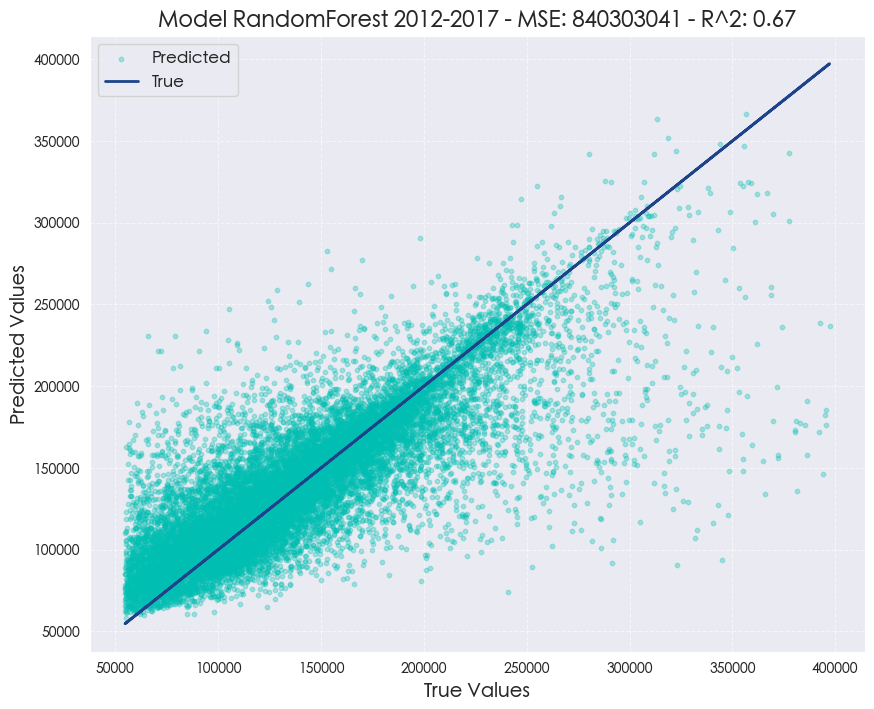

時間段 2012-2017 特徵重要性：
建物移轉總面積坪            0.163946
屋齡區間_未滿3年           0.123821
嫌惡設施_1000m_1500m    0.081205
房屋交易密度分群            0.077935
嫌惡設施_500m_1000m     0.055342
迎毗設施_1000m_1500m    0.055186
嫌惡設施_0m_500m        0.040199
交易日                 0.035553
格局比例_隔間             0.033605
迎毗設施_500m_1000m     0.030756
dtype: float64
時間段 2018-2023 存在日期時間類型的欄位：['交易年月日']，將予以移除。
時間段 2018-2023 處理缺失值和日期欄位後資料量：117521 行
時間段 2018-2023 類別型變數：['屋齡區間', '移轉層次', '建築型態', '建材種類', '土地用途']
時間段 2018-2023 低基數類別型變數（One-Hot 編碼）：['屋齡區間', '移轉層次', '建築型態', '建材種類', '土地用途']
時間段 2018-2023 高基數類別型變數（Label 編碼）：[]
時間段 2018-2023 特徵資料量：117521 行，目標變數資料量：117521 行
時間段 2018-2023 訓練集資料量：82264 行，測試集資料量：35257 行
時間段 2018-2023 訓練集 MSE: 190293672.58, R^2: 0.9646
時間段 2018-2023 測試集 MSE: 1314018267.52, R^2: 0.7547


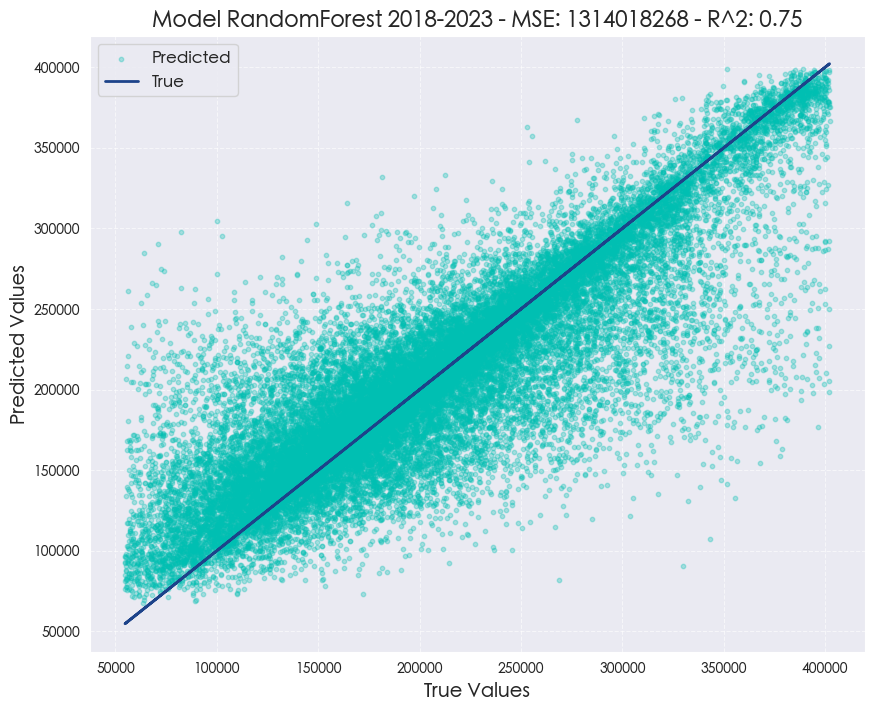

時間段 2018-2023 特徵重要性：
嫌惡設施_1000m_1500m    0.116120
屋齡區間_21年以上－未滿30年    0.106137
建物移轉總面積坪            0.095006
陽台有無                0.092733
嫌惡設施_500m_1000m     0.062462
是否包含車位              0.054503
嫌惡設施_0m_500m        0.048049
迎毗設施_500m_1000m     0.044606
迎毗設施_1000m_1500m    0.042890
房屋交易密度分群            0.039032
dtype: float64


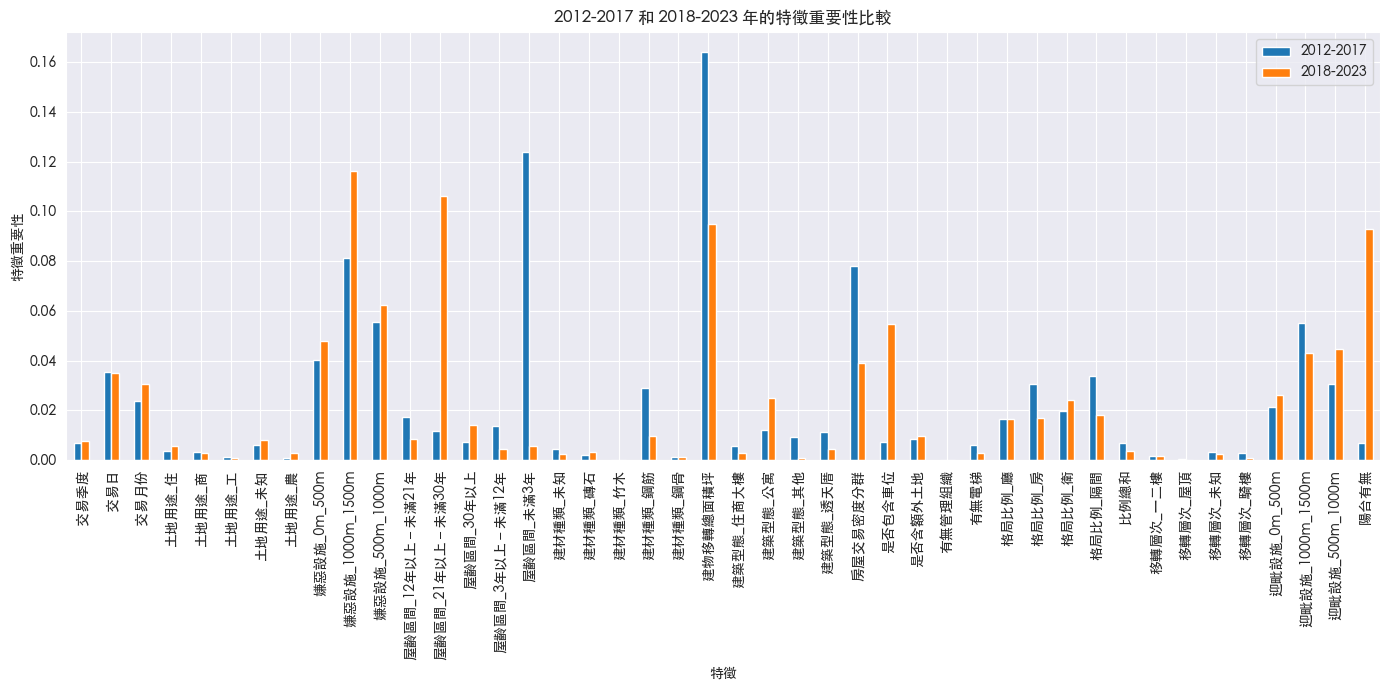

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def plot_rf_results(y_true, y_pred, period_name, mse, r2):
    plt.figure(figsize=(10, 8))
    plt.scatter(y_true, y_pred, color='#00BFB2', label='Predicted', alpha=0.3, s=10)
    plt.plot(y_true, y_true, color='#1D438A', label='True', linewidth=2)
    plt.title(f"Model RandomForest {period_name} - MSE: {mse:.0f} - R^2: {r2:.2f}", fontsize=16, fontweight='bold')
    plt.xlabel("True Values", fontsize=14)
    plt.ylabel("Predicted Values", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def process_and_train(X_subset, y_subset, period_name):
    # 填充缺失值
    numeric_cols = X_subset.select_dtypes(include=['float64', 'int64']).columns
    X_subset[numeric_cols] = X_subset[numeric_cols].fillna(X_subset[numeric_cols].mean())

    categorical_cols = X_subset.select_dtypes(include=['object']).columns
    X_subset[categorical_cols] = X_subset[categorical_cols].fillna(X_subset[categorical_cols].mode().iloc[0])

    # 確保 y 與 X 的索引對齊
    y_subset = y_subset.loc[X_subset.index]

    # 提取日期特徵（可選）
    if '交易年月日' in X_subset.columns:
        X_subset['交易月份'] = X_subset['交易年月日'].dt.month
        X_subset['交易日'] = X_subset['交易年月日'].dt.day
        X_subset['交易季度'] = X_subset['交易年月日'].dt.quarter

    # 移除日期時間類型的欄位
    datetime_cols = X_subset.select_dtypes(include=['datetime64']).columns.tolist()
    if datetime_cols:
        print(f"時間段 {period_name} 存在日期時間類型的欄位：{datetime_cols}，將予以移除。")
        X_subset = X_subset.drop(columns=datetime_cols)

    # 再次檢查資料量
    print(f"時間段 {period_name} 處理缺失值和日期欄位後資料量：{X_subset.shape[0]} 行")

    # 找出類別型變數
    categorical_cols = X_subset.select_dtypes(include=['object']).columns.tolist()
    print(f"時間段 {period_name} 類別型變數：{categorical_cols}")

    # 分離低基數和高基數的類別型變數
    low_cardinality_cols = [col for col in categorical_cols if X_subset[col].nunique() < 10]
    high_cardinality_cols = [col for col in categorical_cols if X_subset[col].nunique() >= 10]

    print(f"時間段 {period_name} 低基數類別型變數（One-Hot 編碼）：{low_cardinality_cols}")
    print(f"時間段 {period_name} 高基數類別型變數（Label 編碼）：{high_cardinality_cols}")

    # 對低基數的類別型變數進行 One-Hot 編碼
    X_subset = pd.get_dummies(X_subset, columns=low_cardinality_cols)

    # 對高基數的類別型變數進行 Label 編碼
    label_encoder = LabelEncoder()
    for col in high_cardinality_cols:
        X_subset[col] = label_encoder.fit_transform(X_subset[col])

    # 確保沒有 NaN 值
    if X_subset.isnull().values.any():
        print(f"時間段 {period_name} 存在 NaN 值，無法訓練模型。")
        return None

    # 分割訓練集和測試集
    features = X_subset.drop(columns=['交易年份'])
    target = y_subset

    # 檢查特徵和目標變數的資料量
    print(f"時間段 {period_name} 特徵資料量：{features.shape[0]} 行，目標變數資料量：{target.shape[0]} 行")

    # 如果資料量過小，無法進行訓練
    if features.shape[0] == 0:
        print(f"時間段 {period_name} 資料量為零，無法訓練模型。")
        return None

    # 分割資料集
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=25)

    print(f"時間段 {period_name} 訓練集資料量：{X_train.shape[0]} 行，測試集資料量：{X_test.shape[0]} 行")

    # 檢查訓練集和測試集是否為空
    if X_train.shape[0] == 0 or X_test.shape[0] == 0:
        print(f"時間段 {period_name} 訓練集或測試集資料量為零，無法訓練模型。")
        return None

    # # 訓練模型
    # rf = RandomForestRegressor(n_estimators=100, random_state=25)
    # rf.fit(X_train, y_train)

    # # 預測和評估
    # y_pred = rf.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # r2 = r2_score(y_test, y_pred)  # 計算 R^2
    # print(f"時間段 {period_name} 隨機森林模型的均方誤差（MSE）：{mse}")
    # print(f"時間段 {period_name} 隨機森林模型的 R^2 值：{r2}")
    # 訓練模型
    rf = RandomForestRegressor(n_estimators=100, random_state=25)
    rf.fit(X_train, y_train)

    # 訓練集的預測和評估
    y_train_pred = rf.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    print(f"時間段 {period_name} 訓練集 MSE: {train_mse:.2f}, R^2: {train_r2:.4f}")

    # 測試集的預測和評估
    y_test_pred = rf.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print(f"時間段 {period_name} 測試集 MSE: {test_mse:.2f}, R^2: {test_r2:.4f}")

    # 繪製測試集的結果
    plot_rf_results(y_test, y_test_pred, period_name, test_mse, test_r2)

    


    # # 繪製結果圖
    # plot_rf_results(y_test, y_pred, period_name, mse, r2)

    # 提取特徵重要性
    feature_importances = pd.Series(rf.feature_importances_, index=features.columns)
    feature_importances = feature_importances.sort_values(ascending=False)
    print(f"時間段 {period_name} 特徵重要性：")
    print(feature_importances.head(10))  # 只顯示前 10 個重要特徵

    return feature_importances

# 主程式部分
# 定義目標變數 y
y = df['單價元每坪']

# 定義需要移除的欄位，保留 '交易年月日'
columns_to_drop = [
    '單價元每坪', '編號', '備註', '鄉鎮市區', '土地位置建物門牌',
    '建築完成年月', '建物移轉總面積平方公尺', 'Region', '緯度', '經度',
    '建築型態清整', '房地總價元', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km',
    '單價元平方公尺', '總價元',
    '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
    '建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木',
    '住', '商', '工', '農', 'bad_count', 'good_count',
    '移轉層次_騎樓', '移轉層次_屋頂', '移轉層次_一二樓', '屋齡', '房地總價元(坪)', '建築完成年', '交易年_民國'
]

# 定義特徵變數 X
X = df.drop(columns=columns_to_drop)

# 解析日期並提取年份
X['交易年月日'] = pd.to_datetime(X['交易年月日'], format='%Y-%m-%d', errors='coerce')
X['交易年份'] = X['交易年月日'].dt.year

# 檢查年份分佈
print("交易年份的分佈：")
print(X['交易年份'].value_counts().sort_index())

# 根據要求的時間段劃分數據
# 時間段一：2012 年 - 2017 年
mask1 = (X['交易年份'] >= 2012) & (X['交易年份'] <= 2017)
X_period1 = X.loc[mask1].copy()
y_period1 = y.loc[mask1]

# 時間段二：2018 年 - 2023 年
mask2 = (X['交易年份'] >= 2018) & (X['交易年份'] <= 2023)
X_period2 = X.loc[mask2].copy()
y_period2 = y.loc[mask2]

# 檢查每個時間段的資料量
print(f"時間段 2012-2017 的資料量：{X_period1.shape[0]} 行")
print(f"時間段 2018-2023 的資料量：{X_period2.shape[0]} 行")

# 對每個時間段的資料進行處理、訓練和結果繪圖
fi_period1 = process_and_train(X_period1, y_period1, "2012-2017")
fi_period2 = process_and_train(X_period2, y_period2, "2018-2023")

# 如果兩個時間段的特徵重要性都成功計算，進行比較
if fi_period1 is not None and fi_period2 is not None:
    # 合併特徵重要性數據
    fi_df = pd.DataFrame({
        '2012-2017': fi_period1,
        '2018-2023': fi_period2
    })

    # 對齊索引
    fi_df = fi_df.fillna(0)

    # 繪製特徵重要性對比圖
    fi_df.plot(kind='bar', figsize=(14, 7))
    plt.title('2012-2017 和 2018-2023 年的特徵重要性比較')
    plt.ylabel('特徵重要性')
    plt.xlabel('特徵')
    plt.tight_layout()
    plt.show()
else:
    print("無法比較特徵重要性，因為某個時間段的模型未成功訓練。")


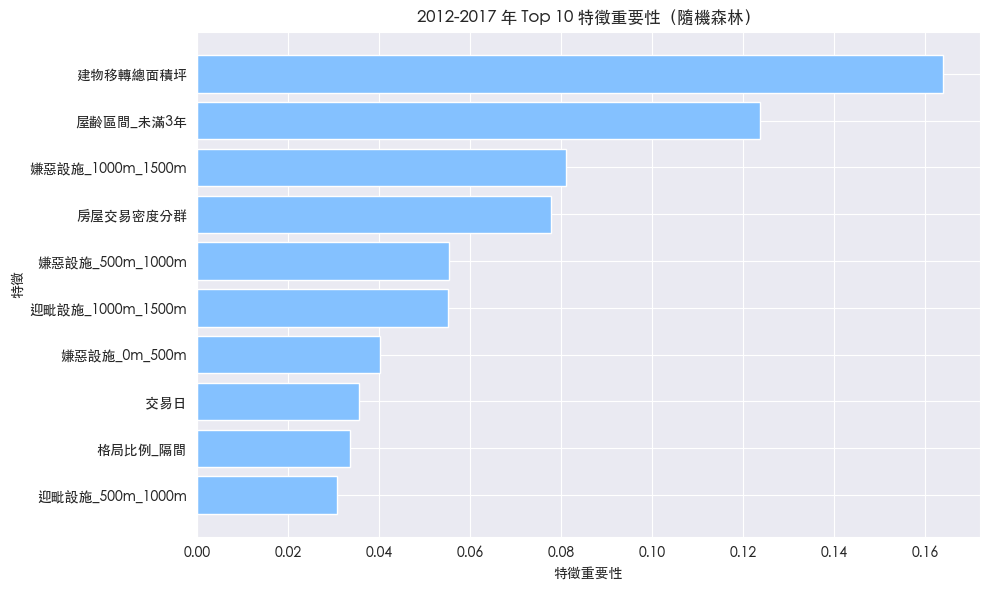

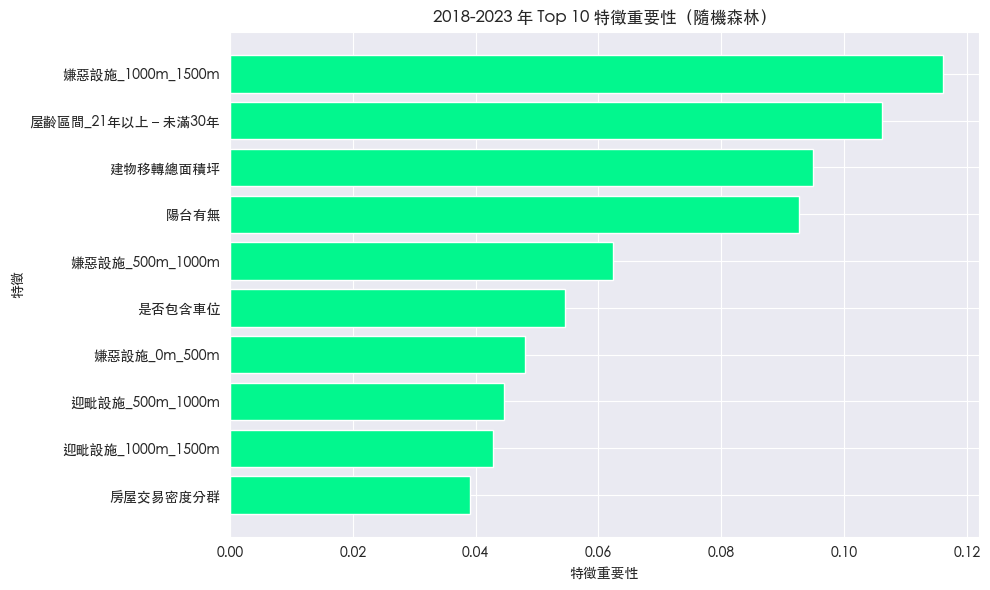

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設 fi_period1 和 fi_period2 分別是兩個時間段的特徵重要性 Series

# 設置中文字體，防止中文亂碼
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑體
plt.rcParams['axes.unicode_minus'] = False    # 正常顯示負號

# 定義要獲取的特徵數量
top_n = 10

# 時間段 2012-2017
fi_period1_top = fi_period1.sort_values(ascending=False).head(top_n)

# 繪製 2012-2017 年的特徵重要性圖
plt.figure(figsize=(10, 6))
plt.barh(fi_period1_top.index[::-1], fi_period1_top.values[::-1], color='#84C1FF')
plt.title('2012-2017 年 Top 10 特徵重要性（隨機森林）')
plt.xlabel('特徵重要性')
plt.ylabel('特徵')
plt.tight_layout()
plt.show()

# 時間段 2018-2023
fi_period2_top = fi_period2.sort_values(ascending=False).head(top_n)

# 繪製 2018-2023 年的特徵重要性圖
plt.figure(figsize=(10, 6))
plt.barh(fi_period2_top.index[::-1], fi_period2_top.values[::-1], color='#02F78E')
plt.title('2018-2023 年 Top 10 特徵重要性（隨機森林）')
plt.xlabel('特徵重要性')
plt.ylabel('特徵')
plt.tight_layout()
plt.show()


1. R2 Score
R2_score (train): 0.9998 和 R2_score (test): 0.9989 都非常接近 1。這表示你的隨機森林模型對訓練集和測試集的解釋能力都很高。具體來說，R2 分數接近 1 表示模型能夠解釋輸入變量與目標變量之間幾乎所有的變異性。
可能的問題：過高的 R2 分數（尤其是在訓練集和測試集都接近 1）可能表明模型有過擬合（overfitting）的風險。這意味著模型在訓練集上學得非常好，但在遇到新的數據時（測試集）可能會有較差的表現。雖然在這裡測試集的 R2 分數也很高，但仍需檢查是否存在過度擬合。
2. RMSE (Root Mean Squared Error)
RMSE (train): 1039.34 和 RMSE (test): 2498.52 分別代表模型在訓練集和測試集上的預測誤差的平方根。RMSE 是衡量模型預測值與真實值之間差距的指標，數值越小，表示預測結果越精準。
RMSE 解釋：
訓練集的 RMSE (1039.34) 顯著小於測試集的 RMSE (2498.52)，這意味著模型在訓練集上表現得比在測試集上更好。
雖然測試集的 RMSE 增加，但考慮到房價數據可能具有較大的數值範圍，這樣的 RMSE 增加或許可以接受，但仍需具體對比房價的範圍來評估 RMSE 的大小是否合理。
3. 綜合解釋
你的模型在訓練集和測試集上的 R2 分數都非常高，表示模型可以很好地擬合資料。然而，訓練集和測試集之間 RMSE 的差距（1039 vs. 2498）表明模型可能有些過度擬合，因為模型在訓練數據上預測得更精確。
建議：
可以嘗試進一步調整模型參數或進行交叉驗證，觀察是否能在測試集上降低 RMSE。
檢查特徵工程是否合理，避免過多使用能過度擬合數據的特徵。
進一步檢查測試集的數據分佈是否與訓練集一致，如果測試集具有不同的特徵分佈，可能需要更大範圍的資料集來進行模型訓練。
這樣的分析可以幫助你理解模型的性能和可能存在的問題，更好地進行模型的優化。

In [ ]:
# !pip install xgboost

交易年份的分佈：
交易年份
2012     6709
2013    14395
2014    13330
2015    11719
2016    11089
2017    13121
2018    14981
2019    19244
2020    24848
2021    23773
2022    17046
2023    17629
2024    13126
Name: count, dtype: int64
時間段 2012-2017 的資料量：70363 行
時間段 2018-2023 的資料量：117521 行

時間段 2012-2017 原始資料量：70363 行
時間段 2012-2017 缺失值統計：
Series([], dtype: int64)
時間段 2012-2017 存在日期時間類型的欄位：['交易年月日']，將予以移除。
時間段 2012-2017 處理缺失值和日期欄位後資料量：70363 行
時間段 2012-2017 類別型變數：['屋齡區間', '移轉層次', '建築型態', '建材種類', '土地用途']
時間段 2012-2017 低基數類別型變數（One-Hot 編碼）：['屋齡區間', '移轉層次', '建築型態', '建材種類', '土地用途']
時間段 2012-2017 高基數類別型變數（Label 編碼）：[]
時間段 2012-2017 特徵資料量：70363 行，目標變數資料量：70363 行
時間段 2012-2017 訓練集資料量：49254 行，測試集資料量：21109 行
時間段 2012-2017 XGBoost 模型的均方誤差（MSE）：919761101.0577152
2012-2017 訓練集 R^2 分數: 0.7125334920711606
2012-2017 測試集 R^2 分數: 0.6428913889535498
時間段 2012-2017 特徵重要性：
屋齡區間_12年以上－未滿21年    7.229954e+11
屋齡區間_未滿3年           7.023751e+11
建築型態_公寓             3.527279e+11
建材種類_鋼筋             3.312278e+11
建材種類_未知            

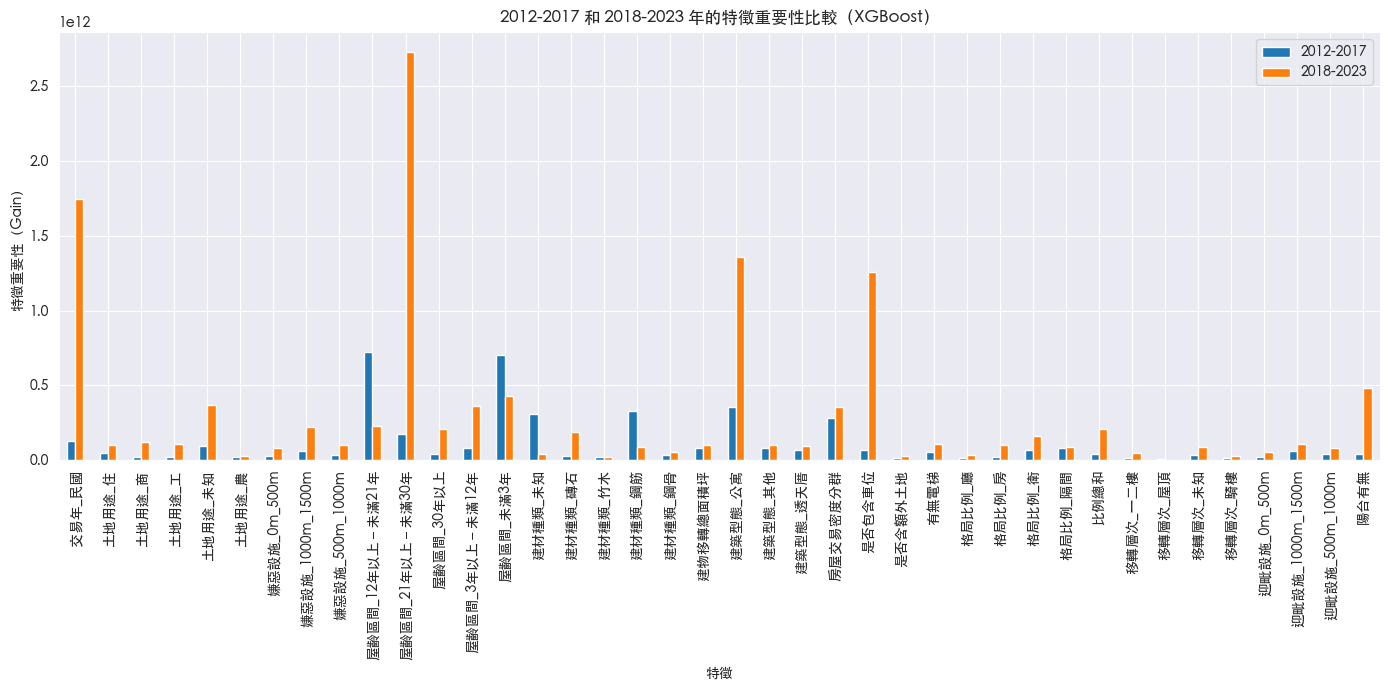

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import xgboost as xgb

# 定義目標變數 y
y = df['單價元每坪']

# 更新需要移除的欄位，保留 '交易年月日'
columns_to_drop = [
    '單價元每坪', '編號', '備註', '鄉鎮市區', '土地位置建物門牌',
    '建築完成年月', '建物移轉總面積平方公尺', 'Region', '緯度', '經度',
    '建築型態清整', '房地總價元', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km',
    '單價元平方公尺', '總價元',
    # 已經 One-Hot 編碼的列
    '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
    '建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木',
    '住', '商', '工', '農', 'bad_count', 'good_count',
    '移轉層次_騎樓', '移轉層次_屋頂', '移轉層次_一二樓', '屋齡', '房地總價元(坪)', '建築完成年'
]

# 定義特徵變數 X
X = df.drop(columns=columns_to_drop)

# 解析日期並提取年份
X['交易年月日'] = pd.to_datetime(X['交易年月日'], format='%Y-%m-%d', errors='coerce')
X['交易年份'] = X['交易年月日'].dt.year

# 檢查年份分佈
print("交易年份的分佈：")
print(X['交易年份'].value_counts().sort_index())

# 根據要求的時間段劃分數據
# 時間段一：2012 年 - 2017 年
mask1 = (X['交易年份'] >= 2012) & (X['交易年份'] <= 2017)
X_period1 = X.loc[mask1].copy()
y_period1 = y.loc[mask1]

# 時間段二：2018 年 - 2023 年
mask2 = (X['交易年份'] >= 2018) & (X['交易年份'] <= 2023)
X_period2 = X.loc[mask2].copy()
y_period2 = y.loc[mask2]

# 檢查每個時間段的資料量
print(f"時間段 2012-2017 的資料量：{X_period1.shape[0]} 行")
print(f"時間段 2018-2023 的資料量：{X_period2.shape[0]} 行")

def process_and_train_xgb(X_subset, y_subset, period_name):
    print(f"\n時間段 {period_name} 原始資料量：{X_subset.shape[0]} 行")

    # 檢查缺失值
    missing_values = X_subset.isnull().sum()
    print(f"時間段 {period_name} 缺失值統計：\n{missing_values[missing_values > 0]}")

    # 填充缺失值
    numeric_cols = X_subset.select_dtypes(include=['float64', 'int64']).columns
    X_subset[numeric_cols] = X_subset[numeric_cols].fillna(X_subset[numeric_cols].mean())

    categorical_cols = X_subset.select_dtypes(include=['object']).columns
    X_subset[categorical_cols] = X_subset[categorical_cols].fillna(X_subset[categorical_cols].mode().iloc[0])

    # 確保 y 與 X 的索引對齊
    y_subset = y_subset.loc[X_subset.index]

    # 移除日期時間類型的欄位
    datetime_cols = X_subset.select_dtypes(include=['datetime64']).columns.tolist()
    if datetime_cols:
        print(f"時間段 {period_name} 存在日期時間類型的欄位：{datetime_cols}，將予以移除。")
        X_subset = X_subset.drop(columns=datetime_cols)

    # 再次檢查資料量
    print(f"時間段 {period_name} 處理缺失值和日期欄位後資料量：{X_subset.shape[0]} 行")

    # 找出類別型變數
    categorical_cols = X_subset.select_dtypes(include=['object']).columns.tolist()
    print(f"時間段 {period_name} 類別型變數：{categorical_cols}")

    # 分離低基數和高基數的類別型變數
    low_cardinality_cols = [col for col in categorical_cols if X_subset[col].nunique() < 10]
    high_cardinality_cols = [col for col in categorical_cols if X_subset[col].nunique() >= 10]

    print(f"時間段 {period_name} 低基數類別型變數（One-Hot 編碼）：{low_cardinality_cols}")
    print(f"時間段 {period_name} 高基數類別型變數（Label 編碼）：{high_cardinality_cols}")

    # 對低基數的類別型變數進行 One-Hot 編碼
    X_subset = pd.get_dummies(X_subset, columns=low_cardinality_cols)

    # 對高基數的類別型變數進行 Label 編碼
    label_encoder = LabelEncoder()
    for col in high_cardinality_cols:
        X_subset[col] = label_encoder.fit_transform(X_subset[col])

    # 確保沒有 NaN 值
    if X_subset.isnull().values.any():
        print(f"時間段 {period_name} 存在 NaN 值，無法訓練模型。")
        return None

    # 分割訓練集和測試集
    features = X_subset.drop(columns=['交易年份'])
    target = y_subset

    # 檢查特徵和目標變數的資料量
    print(f"時間段 {period_name} 特徵資料量：{features.shape[0]} 行，目標變數資料量：{target.shape[0]} 行")

    # 如果資料量過小，無法進行訓練
    if features.shape[0] == 0:
        print(f"時間段 {period_name} 資料量為零，無法訓練模型。")
        return None

    # 分割資料集
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=25)

    print(f"時間段 {period_name} 訓練集資料量：{X_train.shape[0]} 行，測試集資料量：{X_test.shape[0]} 行")

    # 檢查訓練集和測試集是否為空
    if X_train.shape[0] == 0 or X_test.shape[0] == 0:
        print(f"時間段 {period_name} 訓練集或測試集資料量為零，無法訓練模型。")
        return None

    # 轉換為 DMatrix 格式（XGBoost 特有的資料格式）
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # 定義 XGBoost 參數
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'eta': 0.1,
        'max_depth': 6,
        'seed': 25
    }

    # 訓練模型
    num_boost_round = 100
    watchlist = [(dtrain, 'train'), (dtest, 'eval')]
    model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=10, verbose_eval=False)

    # 預測和評估
    y_pred = model.predict(dtest)
    mse = mean_squared_error(y_test, y_pred)
    print(f"時間段 {period_name} XGBoost 模型的均方誤差（MSE）：{mse}")

    # 計算 R^2 分數
    y_train_pred = model.predict(dtrain)
    y_test_pred = model.predict(dtest)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"{period_name} 訓練集 R^2 分數: {train_r2}")
    print(f"{period_name} 測試集 R^2 分數: {test_r2}")

    # 提取特徵重要性
    importance_dict = model.get_score(importance_type='gain')
    feature_importances = pd.Series(importance_dict).sort_values(ascending=False)
    print(f"時間段 {period_name} 特徵重要性：")
    print(feature_importances.head(10))  # 只顯示前 10 個重要特徵

    return feature_importances

# 對時間段 2012-2017 進行處理和訓練
fi_period1_xgb = process_and_train_xgb(X_period1, y_period1, "2012-2017")

# 對時間段 2018-2023 進行處理和訓練
fi_period2_xgb = process_and_train_xgb(X_period2, y_period2, "2018-2023")

# 比較特徵重要性
if fi_period1_xgb is not None and fi_period2_xgb is not None:
    # 合併特徵重要性數據
    fi_df = pd.DataFrame({
        '2012-2017': fi_period1_xgb,
        '2018-2023': fi_period2_xgb
    })

    # 對齊索引
    fi_df = fi_df.fillna(0)

    # 繪製特徵重要性對比圖
    fi_df.plot(kind='bar', figsize=(14, 7))
    plt.title('2012-2017 和 2018-2023 年的特徵重要性比較（XGBoost）')
    plt.ylabel('特徵重要性（Gain）')
    plt.xlabel('特徵')
    plt.tight_layout()
    plt.show()
else:
    print("無法比較特徵重要性，因為某個時間段的模型未成功訓練。")


Model XGBoost 2012-2017 訓練集 MSE: 54967589.18, R^2: 0.9790
Model XGBoost 2012-2017 測試集 MSE: 768685102.43, R^2: 0.7015


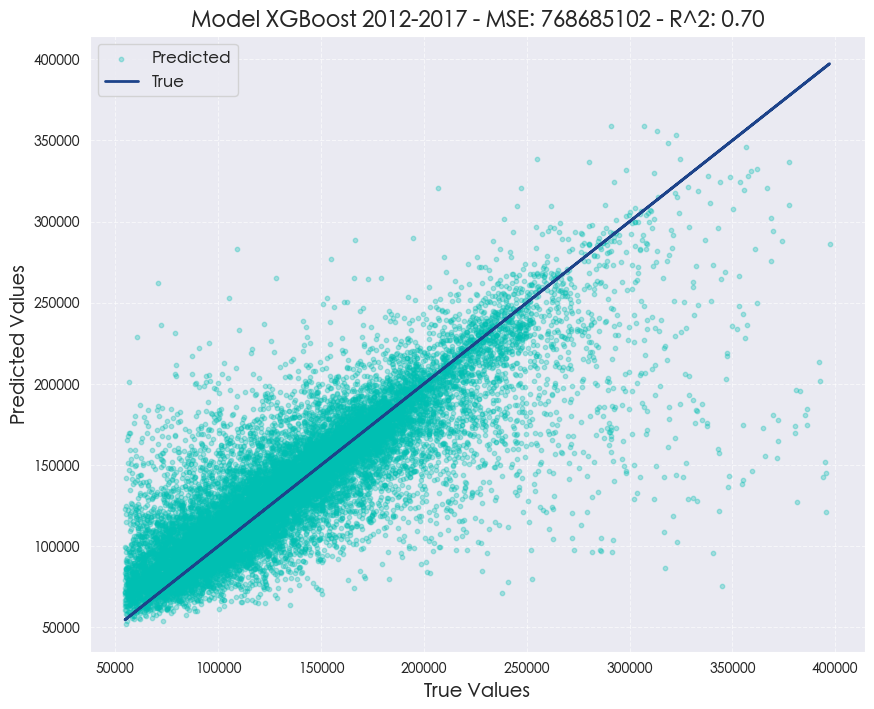

Model XGBoost 2018-2023 訓練集 MSE: 113212325.30, R^2: 0.9789
Model XGBoost 2018-2023 測試集 MSE: 936858315.51, R^2: 0.8251


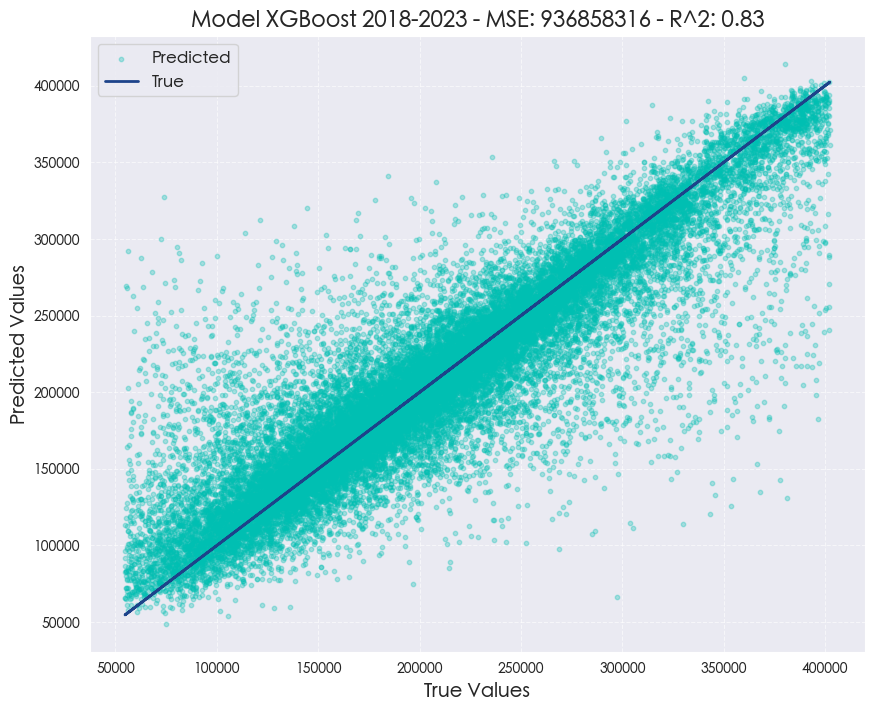

In [52]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

def plot_results(y_true, y_pred, period_name, mse, r2):
    plt.figure(figsize=(10, 8))
    plt.scatter(y_true, y_pred, color='#00BFB2', label='Predicted', alpha=0.3, s=10)
    plt.plot(y_true, y_true, color='#1D438A', label='True', linewidth=2)
    plt.title(f"Model XGBoost {period_name} - MSE: {mse:.0f} - R^2: {r2:.2f}", fontsize=16, fontweight='bold')
    plt.xlabel("True Values", fontsize=14)
    plt.ylabel("Predicted Values", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def process_and_train_xgb(X_subset, y_subset, period_name):
    # 移除 datetime 類型的欄位
    if '交易年月日' in X_subset.columns:
        X_subset = X_subset.drop(columns=['交易年月日'])

    # 處理類別型變數
    categorical_cols = X_subset.select_dtypes(include=['object']).columns.tolist()
    label_encoders = {}
    for col in categorical_cols:
        label_encoders[col] = LabelEncoder()
        X_subset[col] = label_encoders[col].fit_transform(X_subset[col])

    # 分割訓練集和測試集
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.3, random_state=25)

    # 將資料轉換為 XGBoost 的 DMatrix 格式
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # 設定 XGBoost 最佳參數
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'eta': 0.057392769815828214,
        'max_depth': 9,
        'min_child_weight': 1,
        'subsample': 0.7183084144206175,
        'colsample_bytree': 0.9984331910586978,
        'gamma': 0.40565553263172943,
        'reg_alpha': 0.4681174180116772,
        'reg_lambda': 0.6828355439779974,
        'seed': 25
    }

    # 訓練模型
    num_boost_round = 1000  # 可以適當增加迭代次數
    model = xgb.train(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=[(dtrain, 'train'), (dtest, 'eval')],
        early_stopping_rounds=50,
        verbose_eval=False
    )

    # 預測並計算 MSE 和 R^2
    y_train_pred = model.predict(dtrain)
    y_test_pred = model.predict(dtest)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Model XGBoost {period_name} 訓練集 MSE: {train_mse:.2f}, R^2: {train_r2:.4f}")
    print(f"Model XGBoost {period_name} 測試集 MSE: {test_mse:.2f}, R^2: {test_r2:.4f}")

    # 繪製測試集的結果
    plot_results(y_test, y_test_pred, period_name, test_mse, test_r2)

    # 返回特徵重要性
    importance_dict = model.get_score(importance_type='gain')
    feature_importances = pd.Series(importance_dict).sort_values(ascending=False)
    return feature_importances

# 執行模型訓練和繪圖
fi_period1_xgb = process_and_train_xgb(X_period1, y_period1, "2012-2017")
fi_period2_xgb = process_and_train_xgb(X_period2, y_period2, "2018-2023")


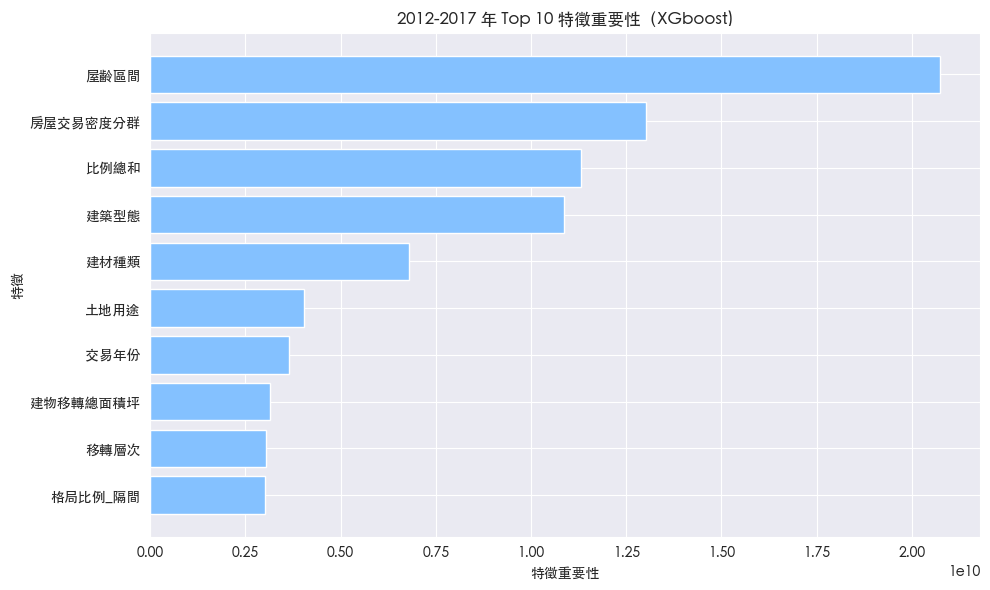

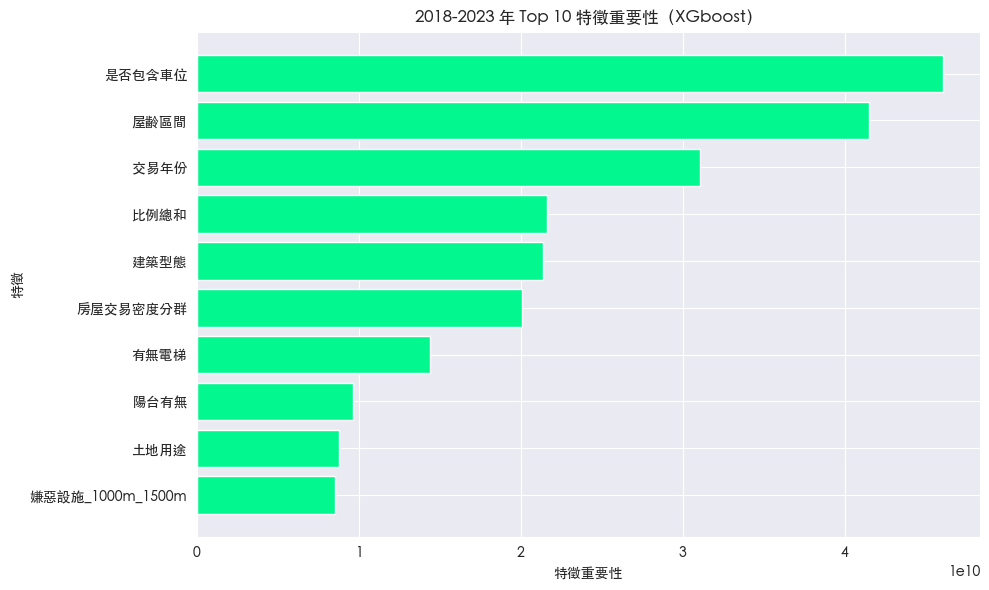

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 fi_period1 和 fi_period2 分别是两个时间段的特征重要性 Series

# 设置中文字体，防止中文乱码
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

# 定义要获取的特征数量
top_n = 10

# 时间段 2012-2017
fi_period1_top = fi_period1_xgb.sort_values(ascending=False).head(top_n)

# 绘制 2012-2017 年的特征重要性图
plt.figure(figsize=(10, 6))
plt.barh(fi_period1_top.index[::-1], fi_period1_top.values[::-1], color='#84C1FF')
plt.title('2012-2017 年 Top 10 特徵重要性（XGboost)')
plt.xlabel('特徵重要性')
plt.ylabel('特徵')
plt.tight_layout()
plt.show()

# 时间段 2018-2023
fi_period2_top = fi_period2_xgb.sort_values(ascending=False).head(top_n)

# 绘制 2018-2023 年的特征重要性图
plt.figure(figsize=(10, 6))
plt.barh(fi_period2_top.index[::-1], fi_period2_top.values[::-1], color='#02F78E')
plt.title('2018-2023 年 Top 10 特徵重要性（XGboost）')
plt.xlabel('特徵重要性')
plt.ylabel('特徵')
plt.tight_layout()
plt.show()


In [ ]:
# !pip install optuna


In [90]:
# import optuna
# from sklearn.model_selection import cross_val_score

# def objective(trial):
#     params = {
#         'objective': 'reg:squarederror',
#         'eta': trial.suggest_loguniform('eta', 0.01, 0.2),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 6),
#         'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
#         'gamma': trial.suggest_uniform('gamma', 0, 0.5),
#         'reg_alpha': trial.suggest_uniform('reg_alpha', 0, 0.5),
#         'reg_lambda': trial.suggest_uniform('reg_lambda', 0.5, 1.5),
#         'seed': 25
#     }
    
#     xgb_model = xgb.XGBRegressor(**params)
    
#     # 使用交叉验证评估模型
#     scores = cross_val_score(xgb_model, X_train, y_train, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
#     return scores.mean()


In [ ]:
# study = optuna.create_study(direction='maximize')  # 因为负的 MSE，所以要最大化
# study.optimize(objective, n_trials=10)

In [ ]:
# print("最佳參數組合：")
# print(study.best_params)

# # 使用最佳参数训练模型
# best_params = study.best_params
# best_params['objective'] = 'reg:squarederror'
# best_params['seed'] = 25

# best_model = xgb.XGBRegressor(**best_params)
# best_model.fit(X_train, y_train)

# # 预测和评估
# y_pred = best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f"測試集的均方誤差（MSE）：{mse}")
